# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset

In [2]:
data = pd.read_csv('../dataset/bitcoin_price.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Python Time Series Index

In [3]:
# Convert 'Date' to datetune and set as index
data['Date'] = pd.to_datetime(data['Date'], format = "%Y-%m-%d")
data.set_index('Date', inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
# Select the Bitcoin Data for
# data.loc['2023']          # Select by year
# data.loc['2023-11']       # Select by year and month
data.loc['2023-11-16']      # Select by year, month, and date

Open         3.787998e+04
High         3.793462e+04
Low          3.554547e+04
Close        3.615477e+04
Adj Close    3.615477e+04
Volume       2.600739e+10
Name: 2023-11-16 00:00:00, dtype: float64

In [5]:
data.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq=None)

Another shorter approach is to use pd.read_csv with some arguments.

In [6]:
# Loading the Data and Setting the index
otherdata = pd.read_csv("../dataset/bitcoin_price.csv", index_col="Date")
otherdata.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [7]:
otherdata.index

Index(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21',
       '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
       ...
       '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
       '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29', '2023-12-30'],
      dtype='object', name='Date', length=3392)

The dtype is object, which is not what we want, the standard for timeseries is a datetime data type. we can do it by adding the parse_date arguments like below.

In [8]:
otherdata = pd.read_csv("../dataset/bitcoin_price.csv", index_col="Date", parse_dates=True)
otherdata.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq=None)

Now the dtype for the index is correct.

In [9]:
# Resampling to monthly frequency and calculate the mean closing price
data.resample('M').mean()           # M for monthly, W for weekly

/var/folders/9_/fy5p9d_52f9d3dxp8df05zlc0000gn/T/ipykernel_91999/3855149256.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data.resample('M').mean()           # M for monthly, W for weekly


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-30,412.654003,421.104422,398.174641,407.182428,407.182428,2.934864e+07
2014-10-31,365.748000,374.314260,354.856645,364.148873,364.148873,2.912885e+07
2014-11-30,364.850235,376.494235,357.241831,366.099799,366.099799,2.199111e+07
2014-12-31,343.074836,347.487129,336.565775,341.267871,341.267871,1.784201e+07
2015-01-31,251.799905,261.391583,240.495550,248.782547,248.782547,3.544555e+07
...,...,...,...,...,...,...
2023-08-31,27959.756615,28204.527722,27517.854587,27852.792843,27852.792843,1.412013e+10
2023-09-30,26271.268229,26573.941862,26041.182292,26306.136393,26306.136393,1.125458e+10
2023-10-31,29511.811114,30155.900454,29235.543977,29755.895161,29755.895161,1.536857e+10


# Exploring Data

We'll look at some key metrics used for time series data

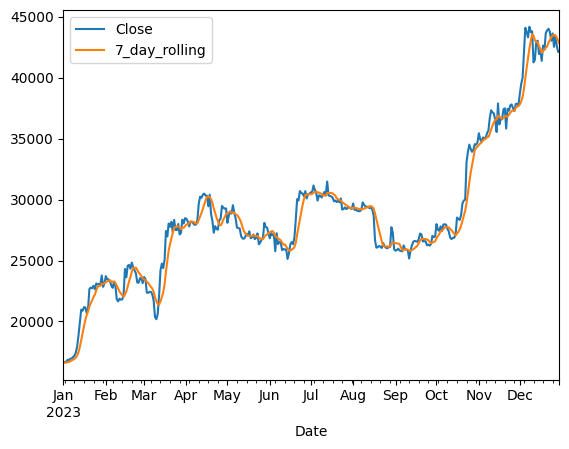

In [10]:
# 7-Day rolling average of the closing price
data['7_day_rolling'] = data['Close'].rolling(window=7).mean()
data[['Close', '7_day_rolling']].loc['2023'].plot()
plt.show()

In [11]:
# Find out the highest average month
data.resample('ME').mean()['Close'].idxmax()

Timestamp('2021-11-30 00:00:00')

we can calculate daily returns such as if the closing value today is 101 and tomorrow is 100, meaning we have 1% return. We can do it simply by using pct_change().

In [12]:
# Calculate Daily Returns
data['daily_returns'] = data['Close'].pct_change() * 100

In [13]:
# Days with more than 10% change in closing price
data[abs(data['daily_returns']) > 10].head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709


# Data Visualization

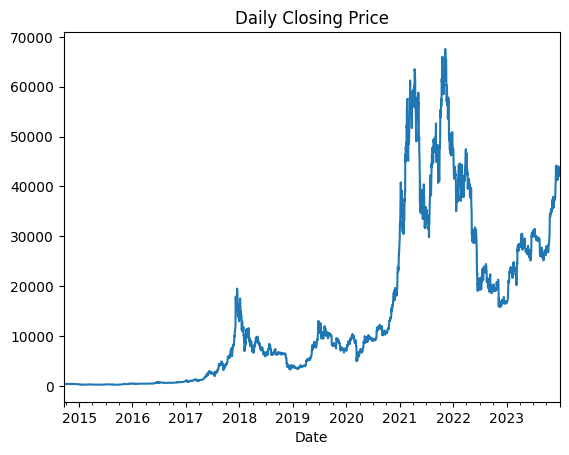

In [14]:
# Daily Closing Price Plot
data['Close'].plot(title='Daily Closing Price')
plt.show()

/var/folders/9_/fy5p9d_52f9d3dxp8df05zlc0000gn/T/ipykernel_91999/1941137415.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data.resample('Y').sum()['Volume'].plot()


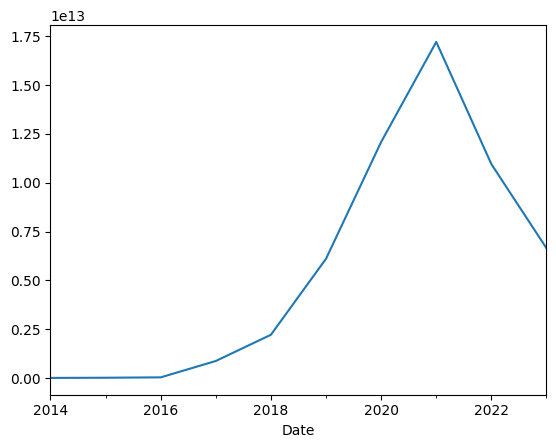

In [15]:
# Plot the yearly volume
data.resample('Y').sum()['Volume'].plot()
plt.show()

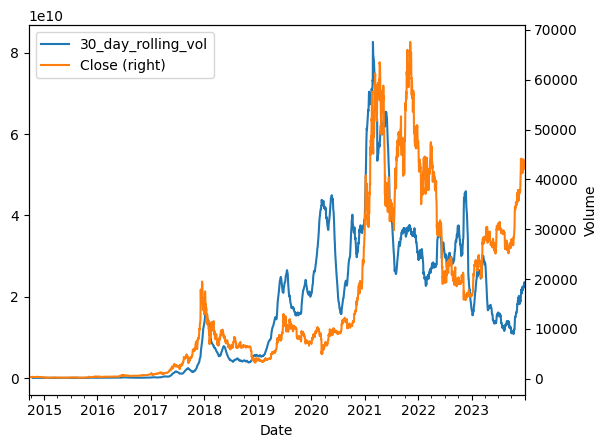

In [16]:
# Plot Closing price and 30-day rolling volume
data['30_day_rolling_vol'] = data['Volume'].rolling(window=30).mean()
data['30_day_rolling_vol'].plot(legend=True)
ax = data['Close'].plot(secondary_y=True, legend=True)
ax.set_ylabel('Volume')
plt.show()

In [17]:
# Correlation between the 30-day rolling volume and the closing price
data[['Close', '30_day_rolling_vol']].corr()

,Close,30_day_rolling_vol
Close,1.000000,0.750445
30_day_rolling_vol,0.750445,1.000000


# Data Manipulation

In [18]:
# Identify missing values
data.isnull().sum()

Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
7_day_rolling          6
daily_returns          1
30_day_rolling_vol    29
dtype: int64

In [19]:
# Fill missing values
data['30_day_rolling_vol'].fillna(method='bfill', inplace=True)

/var/folders/9_/fy5p9d_52f9d3dxp8df05zlc0000gn/T/ipykernel_91999/1687333707.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['30_day_rolling_vol'].fillna(method='bfill', inplace=True)


In [20]:
data.isnull().sum()

Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
7_day_rolling         6
daily_returns         1
30_day_rolling_vol    0
dtype: int64

In [21]:
data['7_day_rolling']

Date
2014-09-17             NaN
2014-09-18             NaN
2014-09-19             NaN
2014-09-20             NaN
2014-09-21             NaN
                  ...     
2023-12-26    43486.929688
2023-12-27    43457.016183
2023-12-28    43279.688058
2023-12-29    43008.473772
2023-12-30    42782.382254
Name: 7_day_rolling, Length: 3392, dtype: float64

In [22]:
# Interpolate missing 7 day rolling
data['7_day_rolling'].interpolate(inplace=True)     # Only works when you don't have the index, so it will fill using linear method
data.isnull().sum()

Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
7_day_rolling         6
daily_returns         1
30_day_rolling_vol    0
dtype: int64

In [23]:
# Extract time variables
data['year'] = data.index.year
data['month'] = data.index.month
data['day'] = data.index.day
data['weekday'] = data.index.day_name()
data['weekday_numeric'] = data.index.weekday

data['is_weekend'] = data.index.weekday > 4

data.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_rolling,daily_returns,30_day_rolling_vol,year,month,day,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,Wednesday,2,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,Thursday,3,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,Friday,4,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,Saturday,5,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,Sunday,6,True


In [24]:
# Feature Engineering - Lagged values
data['closed_lag1'] = data['Close'].shift(1)
data['closed_lag2'] = data['Close'].shift(2)

# Seasonal Decomposition

Seasonal Decomposition identifies the trend, seasonality, and error term.

## Trend

Trend is the general direction of the time series

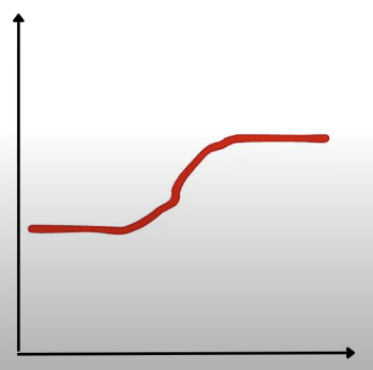

## Seasonality

Seasonal cycles (higher during summer, lower during winter). The graph should have an amplitude between the top and the bottom that is constant and cyclical.

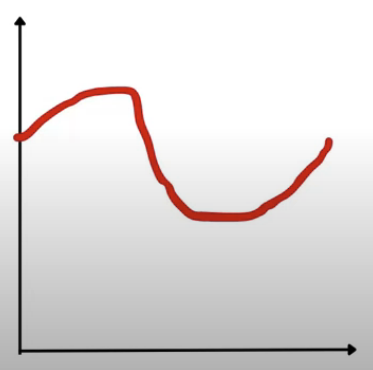

**There are two types of seasonality:** <br/>
**1. Additive** <br/>
cycles are constant in value. It is characterized by having constant seasonal fluctuations. <br/><br/>
Example:
- increasing 10 units every July
- Decreasing 50 units every december

**2. Multiplicative** <br/>
cycles are proportional to the trend. The fluctuations also increase or decrease over time.<br/><br/>
Example:
- increasing 10% of units every July
- Decreasing 50% of units every december

## Error

What is not explained by the trend and seasonality.

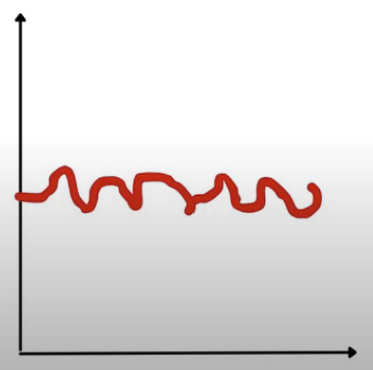

**How to identify the seasonality type of your time series?**
There is not a statistical test which can determine the seasonality type. But we still have 2 options:

**Option 1: Data Visualization**
Check the graph to see the trend and fluctuations manually.

**Option 2: Model Performance**
Another way is that, we can just focus on the model performance. Creating 2 models to see which type of seasonality fits best the time series.

Option 2 is more preferrable as it is more results driven.

# Python Seasonal Plot

In [25]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

/var/folders/9_/fy5p9d_52f9d3dxp8df05zlc0000gn/T/ipykernel_91999/2965045222.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(data['Close'].resample('M').mean(), ylabel='Closing')


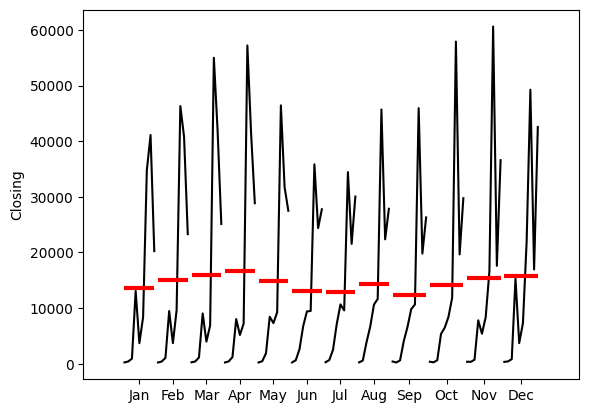

In [ ]:
# Plotting the monthly seasonality
month_plot(data['Close'].resample('ME').mean(), ylabel='Closing')
plt.show()

The red is the average value through time. It represents the seasonal curve which in this case is really tiny because the variance of the line is low. <br /><br />
The black represents the values for each of those month throughout all the years. For January, it plots the value from the earliest year to the latest year.

/var/folders/9_/fy5p9d_52f9d3dxp8df05zlc0000gn/T/ipykernel_91999/3621270203.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(data['Close'].resample('Q').mean(), ylabel='Closing')


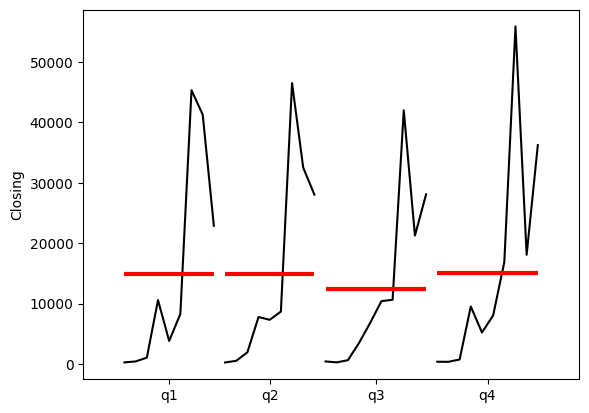

In [38]:
# Plotting the quarterly seasonality
quarter_plot(data['Close'].resample('Q').mean(), ylabel='Closing')
plt.show()

Because the seasonal curve is not visible, we will try the other dataset, the choco_monthly_revenue.csv.

In [42]:
# Load new data
data_choco = pd.read_csv('../dataset/choco_monthly_revenue.csv', index_col=0, parse_dates=True)     # index_col = 0 means that we use the column[0] as the index
data_choco.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


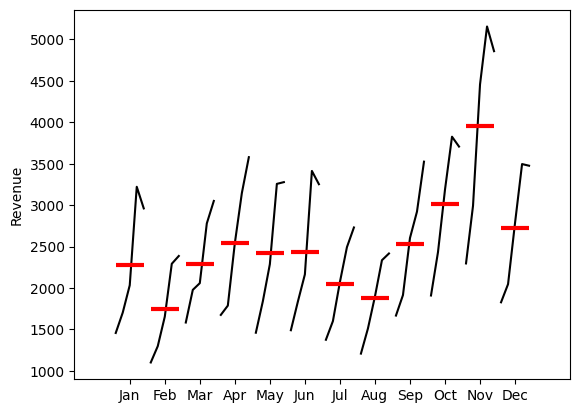

In [45]:
# Plotting the monthly seasonality
month_plot(data_choco['revenue'], ylabel='Revenue')
plt.show()

# Python Seasonal Decomposition II

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

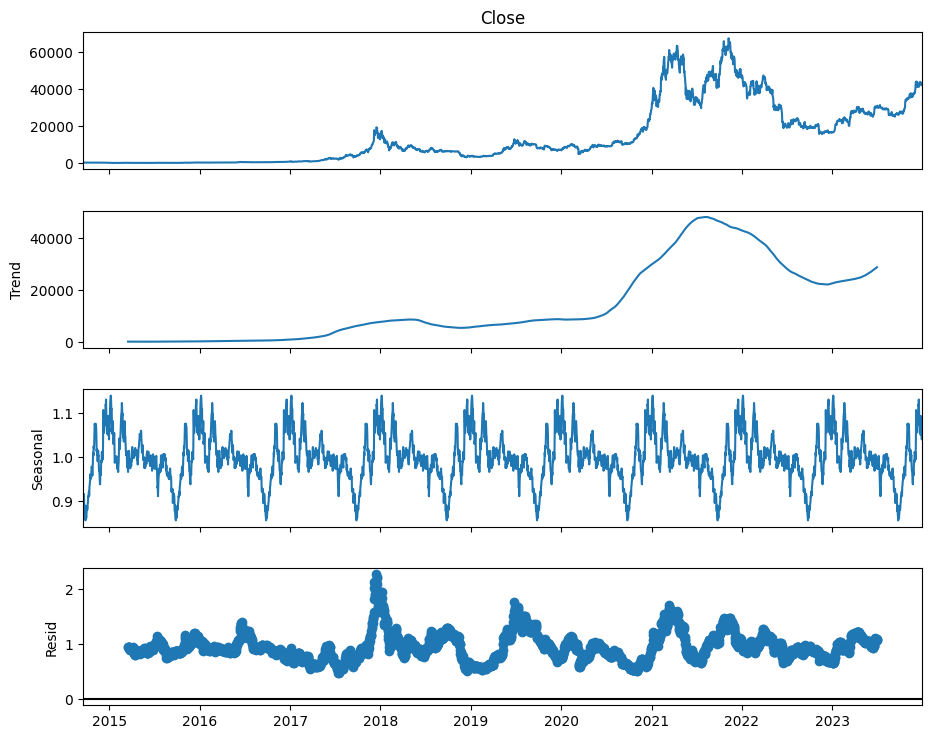

In [51]:
# Seasonal Decomposition Plots for Bitcoin Data
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=365)

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

multiplicative = when the data grows and the fluctuations is exponential over time. <br />
additive = when the seasonal fluctutations is constant in absolute, they don't change over time.

multiplicative model is more common and more obvious.

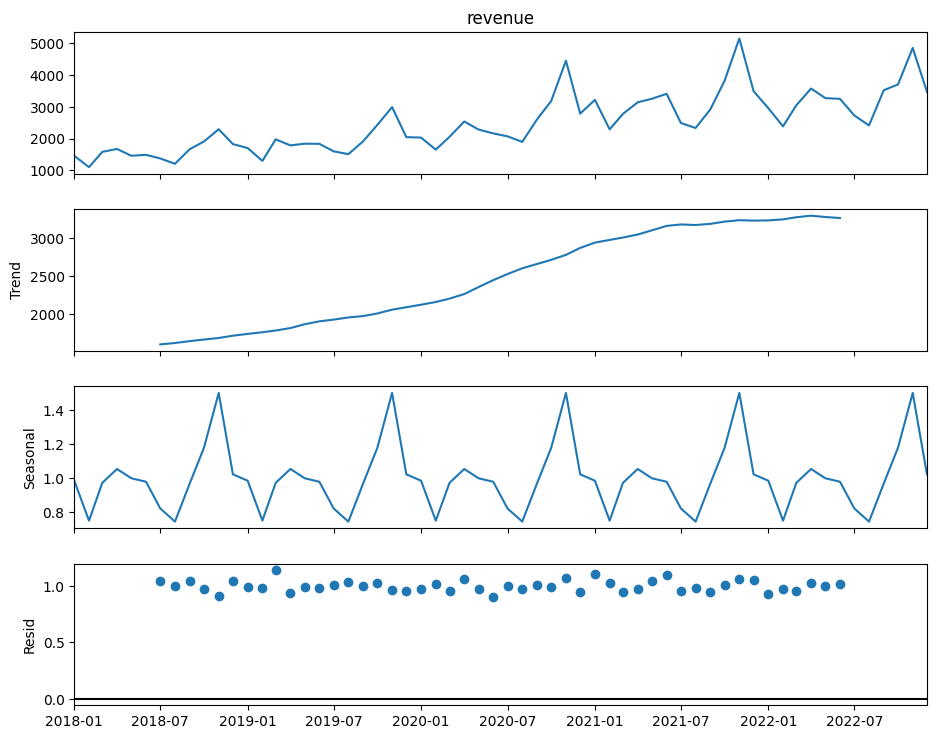

In [66]:
# Seasonal Decomposition Plots for Chocolate Revenue Data
decomposition = seasonal_decompose(data_choco['revenue'], model='multiplicative', period=12)

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

**How to set the period arguments?** <br />
If the dataset entry ferquency is daily, use 365 as there are 365 days in 1 period.<br />
If the dataset entry frequency is montly, use 12 as there are 12 months in 1 year period.

Explanation by ChatGPT: <br />
📌 1. Observed
Definition: The original time series (e.g., stock price or revenue).

What it indicates: Real values, combining trend, seasonality, and residuals.

Spikes:

📈 Good in sales when revenue grows.

📉 Good in stock markets when prices drop and you're looking to buy.

📌 2. Trend
Definition: The long-term direction, filtered from short-term noise and seasonality.

What it indicates: Overall growth or decline over time.

Spikes:

📈 Good in both sales and investments — indicates sustained upward movement.

📉 Bad if it’s a long-term drop — may signal declining performance or value.

📌 3. Seasonal
Definition: Repeating short-term patterns (monthly, weekly, yearly, etc.).

What it indicates: Regular cycles like holidays, paydays, or weather effects.

Spikes:

📈 Expected in sales during holidays or events (e.g., December).

📉 Normal in off-seasons (e.g., summer slump for chocolate).

In stocks: may be useful for seasonal trading strategies, but less reliable alone.

📌 4. Residual
Definition: What’s left after removing trend and seasonality — the unexpected variation.

What it indicates: Surprises, anomalies, news impacts, or model error.

Spikes:

📈 Good in sales if caused by marketing success or viral product.

📈 Bad in stocks if the price jumps for no fundamental reason (bubble).

📉 Good in stocks when buying opportunity appears (sudden price dip).

📉 Bad in sales if demand drops unexpectedly.